In [7]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor

X, y = load_boston(return_X_y=True) 
coor = preprocessing.scale(X)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
array10 = np.linspace(1, 10, num=200)

for p_number in array10:
    kreg = KNeighborsRegressor(n_neighbors=5,weights='distance', p=p_number)
    vals = cross_val_score(kreg, coor, y, cv=kf, scoring='neg_mean_squared_error')
    print('Метрика p=',p_number,'Цена за недвижимость = ', np.mean(vals)) 


Метрика p= 1.0 Цена за жилье =  -16.030646734221644
Метрика p= 1.0452261306532664 Цена за жилье =  -16.40783870832999
Метрика p= 1.0904522613065326 Цена за жилье =  -16.370696947059045
Метрика p= 1.135678391959799 Цена за жилье =  -16.445716308439433
Метрика p= 1.1809045226130652 Цена за жилье =  -16.475057773399403
Метрика p= 1.2261306532663316 Цена за жилье =  -16.526432329318258
Метрика p= 1.271356783919598 Цена за жилье =  -16.636709345898257
Метрика p= 1.3165829145728645 Цена за жилье =  -16.82422425426731
Метрика p= 1.3618090452261307 Цена за жилье =  -16.874209056598744
Метрика p= 1.4070351758793969 Цена за жилье =  -17.124898819792115
Метрика p= 1.4522613065326633 Цена за жилье =  -17.145231882153887
Метрика p= 1.4974874371859297 Цена за жилье =  -17.01936008026763
Метрика p= 1.542713567839196 Цена за жилье =  -17.09913173771377
Метрика p= 1.5879396984924623 Цена за жилье =  -16.801326640288362
Метрика p= 1.6331658291457287 Цена за жилье =  -16.980745198189776
Метрика p= 1.6783

In [13]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

dataPerTrain = np.genfromtxt('perceptron-train.csv', delimiter=',')
dataPerTest = np.genfromtxt('perceptron-test.csv', delimiter=',')

Y_PerTrain = dataPerTrain[:,0]
X_PerTrain = dataPerTrain[:,1:]

Y_PerTest = dataPerTest[:,0]
X_PerTest = dataPerTest[:,1:]

clf = Perceptron( max_iter=5, tol=None, random_state=241)
perc =clf.fit(X_PerTrain,Y_PerTrain)
result = perc.predict(X_PerTest)
resultScore = accuracy_score(Y_PerTest, result)
print(resultScore)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_PerTrain)
X_test_scaled = scaler.transform(X_PerTest)

print('**************************')

clf2 = Perceptron( max_iter=5, tol=None, random_state=241)
perc2 =clf2.fit(X_train_scaled,Y_PerTrain)
result2 = perc2.predict(X_test_scaled)
resultScore2 = accuracy_score(Y_PerTest, result2)
print(resultScore2)










0.655
**************************
0.84


In [63]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import KFold

newsgroups = datasets.fetch_20newsgroups(
                    subset='all', 
                    categories=['alt.atheism', 'sci.space']
             )
news = newsgroups.data
Y_news = newsgroups.target
vectorizer = TfidfVectorizer()
X_news = vectorizer.fit_transform(news)


cv = KFold(n_splits=5, shuffle=True, random_state=241)


clf = SVC(C=1.0, kernel='linear', random_state=241)
clf.fit(X_news,Y_news)

W = np.sort(np.absolute(clf.coef_.toarray())) #отсортированные по модулю веса слов
indices = np.argsort(np.absolute(clf.coef_.toarray())) #отсортированные по модулю весов индексы слов
ten_indices = np.array(indices[0,-10:], dtype=int) #последние 10 индексов
list = [vectorizer.get_feature_names()[i] for i in ten_indices]
print(np.sort(list))













['atheism' 'atheists' 'bible' 'god' 'keith' 'moon' 'religion' 'sci' 'sky'
 'space']


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score


data = pd.read_csv('data-logistic.csv', header=None)
X = data.iloc[:,1:]
y = data.iloc[:,0]



w1 = 0   # вес 1
w2 = 0   # вес 2
k  = 0.1 # шаг
max_iter = 10000   # максимальное кол-во итераций
evk_min  = 0.00001 # минимальное евклидовое расcтояние

def logistic_reqression(X, y, w1=0, w2=0, c=0, k=0.1, max_iter=100, evk_min=0.00001):
    l = len(y)
    for j in range(max_iter):
        summa1 = 0
        summa2 = 0
        for i in range(l):
            s = 1 - 1 / (1 + np.exp( -y[i] * (w1 * X[1][i] + w2 * X[2][i]) ))
            summa1 = summa1 + y[i] * X[1][i] * s
            summa2 = summa2 + y[i] * X[2][i] * s
        w1new = w1 + k / l * summa1 - k * c * w1
        w2new = w2 + k / l * summa2 - k * c * w2
        evk = np.sqrt( (w1new - w1)**2 + (w2new - w2)**2 )
#        print('Шаг', j, 'евклид. расстояние: %0.6f' %evk)
#        print('w1=%.8f, w2=%.8f' %(w1, w2))
        if ( evk < evk_min ): break
        w1, w2 = w1new, w2new
    return w1, w2

def auc_roc(X, y, w1=0, w2=0):
    l = len(y)
    a = []
    for i in range(l):
        a.append( 1 / (1 + np.exp( - w1*X[1][i] - w2*X[2][i])) )
    return roc_auc_score(y, a)

ww1, ww2 = logistic_reqression(X, y, c=0)
print('w1=%.8f, w2=%.8f' %(ww1, ww2))
#print ('C=0:', auc_roc(X, y, ww1, ww2))
print(roc_auc_score(y, [1/(1 + np.exp(-ww1*X[1][i] - ww2*X[2][i])) for i in range(len(y))]))

ww1, ww2 = logistic_reqression(X, y, c=10)
print('w1=%.8f, w2=%.8f' %(ww1, ww2))
#print ('C=10:', auc_roc(X, y, ww1, ww2))
print(roc_auc_score(y, [1/(1 + np.exp(-ww1*X[1][i] - ww2*X[2][i])) for i in range(len(y))]))





w1=0.27874229, w2=0.10040298
0.9281904761904761
w1=0.02856197, w2=0.02478366
0.9362857142857142


In [83]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

classTrain = np.genfromtxt('class.csv', delimiter=',')
tp = 0
fp = 0
tn = 0
fn = 0
i = 1
while i < 201:
     s = classTrain[i]  
     
     if(s[0] == 1 and s[1] == 1): tp += 1

     if(s[0] == 1 and s[1] == 0): fp += 1

     if(s[0] == 0 and s[1] == 1): fn += 1

     if(s[0] == 0 and s[1] == 0): tn += 1

     i+=1

print('tp=',tp,' fp=',fp,' fn=', fn, ' tn=',tn)
y_true = classTrain[1:201,0]
y_pred = classTrain[1:201,1] 

acc = accuracy_score(y_true,y_pred)
print('accuracy=',acc)
pre = precision_score(y_true,y_pred)
print('precision=',pre)
recall = recall_score(y_true,y_pred)
print('recall=',recall)
f1 = f1_score(y_true,y_pred)
print('f1=',f1)

scoreTrain = np.genfromtxt('score.csv', delimiter=',')
y_true = scoreTrain[1:201,0]
y_logreg = scoreTrain[1:201,1]
y_svm = scoreTrain[1:201,2]
y_knn = scoreTrain[1:201,3]
y_tree = scoreTrain[1:201,4]

logreg = roc_auc_score(y_true, y_logreg)
score_svm = roc_auc_score(y_true, y_svm)
score_knn = roc_auc_score(y_true, y_knn)
score_tree = roc_auc_score(y_true, y_tree)

print(logreg,score_svm,score_knn,score_tree)

precision_log, recall_log, thresholds_log = precision_recall_curve(y_true,y_logreg)

precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true,y_svm)

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true,y_knn)

precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_true,y_tree)
#print('precision_log=',precision_log)
#print('recall_log=',recall_log[85])
recall_tree_size = recall_tree.size
index_log = []

for i in range(recall_tree_size):
    if(recall_tree[i]>=0.7): 
        index_log.append(i)

print('index_knn=', index_log)
prec_search = precision_log[0:86]
max_log_precision = np.amax(prec_search)
print('log_max=', max_log_precision)

prec_svm = precision_svm[0:89]
max_svm_precision = np.amax(prec_svm)
print('svm_max=',max_svm_precision)



prec_knn = precision_knn[0:41]
max_knn_precision = np.amax(prec_knn)
print('knn_max=',max_knn_precision)

prec_tree = precision_tree[0:6]
max_tree_precision = np.amax(prec_tree)
print('tree_max=',max_tree_precision)









tp= 43  fp= 59  fn= 34  tn= 64
accuracy= 0.535
precision= 0.5584415584415584
recall= 0.4215686274509804
f1= 0.48044692737430167
0.719187675070028 0.7086834733893557 0.6351540616246498 0.6919267707082833
index_knn= [0, 1, 2, 3, 4, 5]
log_max= 0.6302521008403361
svm_max= 0.6228070175438597
knn_max= 0.6065573770491803
tree_max= 0.6517857142857143


In [1]:
import numpy as np
from scipy.sparse import coo_matrix, hstack
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge

classTrain = pandas.read_csv('salary.csv',sep=',')
classTest = pandas.read_csv('salary_test.csv',sep=',')

X_train = classTrain.loc[:,'FullDescription':'ContractTime']
Y_train = classTrain.loc[:,'SalaryNormalized']

y_tr = Y_train.to_numpy()
print(y_tr)



X_test = classTest.loc[:,'FullDescription':'ContractTime']
Y_test = classTest.loc[:,'SalaryNormalized']

X_train['FullDescription'] = X_train['FullDescription'].map(lambda x:x.lower())
X_train['FullDescription'] = X_train['FullDescription'].replace('[^a-zA-Z0-9]', ' ', regex = True)

X_train['LocationNormalized'] = X_train['LocationNormalized'].map(lambda x:x.lower())
X_train['LocationNoclassTrainrmalized'] = X_train['LocationNormalized'].replace('[^a-zA-Z0-9]', ' ', regex = True)

X_train['ContractTime'] = X_train['ContractTime'].replace('[^a-zA-Z0-9]', ' ', regex = True)

X_train['LocationNormalized'].fillna('nan', inplace=True)
X_train['ContractTime'].fillna('nan', inplace=True)

vectorizer = TfidfVectorizer(min_df=5)
X_train_vec = vectorizer.fit_transform(X_train['FullDescription'])
X_test_vec = vectorizer.transform(X_test['FullDescription'])

enc = DictVectorizer()
X_train_categ = enc.fit_transform(X_train[['LocationNormalized', 'ContractTime']].to_dict('records'))
X_test_categ = enc.transform(X_test[['LocationNormalized', 'ContractTime']].to_dict('records'))


X_for_train = hstack([X_train_vec, X_train_categ])
X_for_test = hstack([X_test_vec, X_test_categ])

#print(X_for_train)
ridge = Ridge(alpha =1, random_state = 241)
ridge.fit(X_for_train,Y_train)
answer = ridge.predict(X_for_test)
leng = answer.size
print(leng)
answerRound = np.around(answer, decimals=2)
print(answerRound) 






[33000 50000 40000 ... 24500 65000 23040]
2
[55899.79 37110.28]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

data = pandas.read_csv('close_prices.csv')
x_data = data.iloc[:,1:]

jonse = pandas.read_csv('djia_index.csv')
jonse = jonse.iloc[:,1:]

#print(x_data)
X = np.array(x_data)
pca = PCA(n_components=10)
pca.fit(X)

count = 0
sum = 0
for i in range(len(pca.explained_variance_ratio_)):
    count+=1
    value = pca.explained_variance_ratio_[i]
    sum+= value
    if sum > 0.9:
        break

print("Need components %d" % count)

first = pandas.DataFrame(pca.transform(X)[:,0])
coef = np.corrcoef(first.T, jonse.T)[1,0]
print("Corrcoef %0.2f" % coef)






In [ ]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


data = pandas.read_csv('abalone.csv')
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

X = data.iloc[:,:8]
y_dt = data.iloc[:,8:9]
X_data = np.array(X)
Y_data = np.array(y_dt)
def get_r2_score(estimator, x, y_true):
    y_pred = estimator.predict(x)
    return r2_score(y_true, y_pred)

tr = 1
while tr < 51:
    clf = RandomForestRegressor(n_estimators=tr,random_state=1)
    clf.fit(X, y)
    #predictions = clf.predict(X)
    #print(predictions)
    kf = KFold(n_splits=5, shuffle=True, random_state=1)    
    vals = cross_val_score(clf, X=X_data, y=Y_data, cv=kf, scoring=get_r2_score)
    print('количество деревьев-', tr,'качество:', round(vals.mean(),2))
    #clf.fit(X, y)
    tr +=1




Iter       Train Loss   Remaining Time 
         1           1.0190           49.55s
         2           0.9192           57.04s
         3           0.8272           54.01s
         4           0.7834           56.03s
         5           0.7109           55.71s
         6           0.6368           55.47s
         7           0.5797           54.54s
         8           0.5610           55.30s
         9           0.5185           54.04s
        10           0.4984           54.24s
        20           0.1999           53.65s
        30           0.1313           51.91s
        40           0.0790           47.47s
        50           0.0511           44.53s
        60           0.0352           41.66s
        70           0.0245           40.15s
        80           0.0162           37.82s
        90           0.0114           35.66s
       100           0.0077           33.23s
       200           0.0004            9.56s
размер теста =  5329776
learning_rate=1 k.max =  0.210704966

<Figure size 432x288 with 0 Axes>

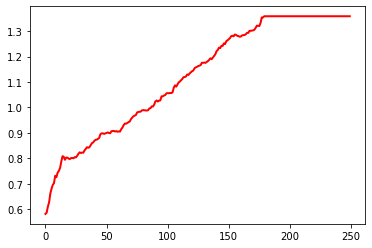

Iter       Train Loss   Remaining Time 
         1           1.1255           52.29s
         2           1.0035           56.42s
         3           0.9386           52.69s
         4           0.8844           53.63s
         5           0.8381           52.97s
         6           0.7995           56.61s
         7           0.7559           56.97s
         8           0.7205            1.02m
         9           0.6958           59.47s
        10           0.6725           58.61s
        20           0.4672           54.56s
        30           0.3179           49.37s
        40           0.2274           48.86s
        50           0.1774           48.65s
        60           0.1394           47.74s
        70           0.1050           44.27s
        80           0.0805           41.34s
        90           0.0650           38.42s
       100           0.0511           36.32s
       200           0.0058           11.95s
размер теста =  5329776
learning_rate=0.5 k.max =  0.2446808

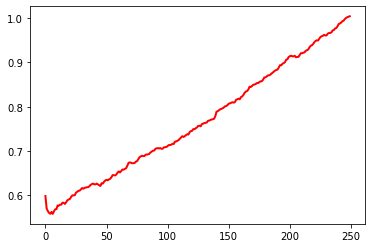

Iter       Train Loss   Remaining Time 
         1           1.2095           56.03s
         2           1.1006           53.94s
         3           1.0240           54.92s
         4           0.9729            1.00m
         5           0.9387            1.11m
         6           0.8948            1.09m
         7           0.8621            1.17m
         8           0.8360            1.25m
         9           0.8171            1.20m
        10           0.7883            1.20m
        20           0.6029           59.90s
        30           0.4760           55.84s
        40           0.3879           52.23s
        50           0.3325           48.58s
        60           0.2759           45.41s
        70           0.2304           42.66s
        80           0.1969           39.94s
        90           0.1718           37.61s
       100           0.1404           34.95s
       200           0.0358           11.94s
размер теста =  5329776
subsample=0.3 k.max =  0.27207100524

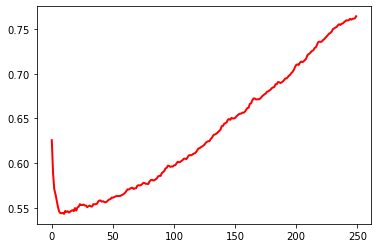

Iter       Train Loss   Remaining Time 
         1           1.2613            1.27m
         2           1.1715            1.46m
         3           1.1009            1.23m
         4           1.0529            1.18m
         5           1.0130            1.09m
         6           0.9740            1.10m
         7           0.9475            1.08m
         8           0.9197            1.07m
         9           0.8979            1.13m
        10           0.8730            1.13m
        20           0.7207            1.05m
        30           0.6055           58.66s
        40           0.5244           55.72s
        50           0.4501           52.18s
        60           0.3908           50.60s
        70           0.3372           47.95s
        80           0.3009           44.39s
        90           0.2603           40.68s
       100           0.2327           37.45s
       200           0.0835           11.90s
размер теста =  5329776
learning_rate=0.2 k.max =  0.2903123

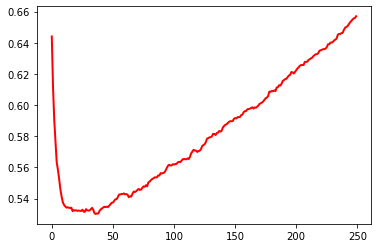

Iter       Train Loss   Remaining Time 
         1           1.3199            1.78m
         2           1.2645            1.49m
         3           1.2170            1.31m
         4           1.1775            1.21m
         5           1.1404            1.28m
         6           1.1106            1.25m
         7           1.0844            1.21m
         8           1.0617            1.21m
         9           1.0411            1.17m
        10           1.0223            1.15m
        20           0.8864           58.55s
        30           0.7844           55.18s
        40           0.7176           53.46s
        50           0.6590           51.68s
        60           0.6120           48.86s
        70           0.5599           46.13s
        80           0.5242           43.01s
        90           0.4829           40.11s
       100           0.4473           37.20s
       200           0.2379           11.58s
размер теста =  5329776
learning_rate=0.1 k.max =  0.2978514

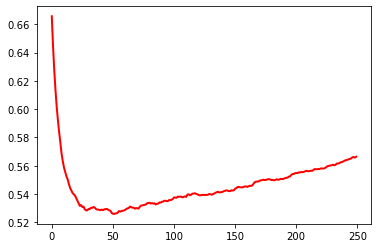

In [1]:
import numpy as np
import pandas
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

datFrame = pandas.read_csv('gbm.csv')
gbm = datFrame.values

y = gbm[:,0]
X = gbm[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241) 
plt.figure()

for label, color, learn_value in [('learning_rate=1', 'orange', 1.0),
                             ('learning_rate=0.5', 'turquoise', 0.5),
                             ('subsample=0.3', 'blue', 0.3),
                             ('learning_rate=0.2', 'gray',0.2),
                             ('learning_rate=0.1', 'magenta',0.1)]: 
     gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241,learning_rate=learn_value)    
     gbc.fit(X_train,y_train)
     print('размер теста = ',X_test.size)
     forest_k = np.zeros((250,), dtype=np.float64)
     test_deviance = np.zeros((250,), dtype=np.float64)    
     for i, y_pred in enumerate(gbc.staged_decision_function(X_test)):
         y_pred_test = 1.0/(1.0 + np.exp(-y_pred))
         forest_k[i] = r2_score(y_test, y_pred_test)
         test_deviance[i] = log_loss(y_test, y_pred_test)         

     testMax = test_deviance.max()
     kMax = forest_k.max()
     print(label,'k.max = ',kMax,' при иттерации = ',np.where( forest_k == kMax))
     print(label,'test_loss.max = ',testMax,' при иттерации = ',np.where(test_deviance == testMax))
     testMin = test_deviance.min()
     print(label,'test_loss.min = ',testMin, ' при иттерации = ',np.where(test_deviance == testMin))    
     plt.figure()
     plt.plot(test_deviance, 'r', linewidth=2)    
     plt.show()




    
  
    





In [8]:
import skimage
from skimage.io import imread
from sklearn.cluster import KMeans
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
image = imread('parrots.jpg')
image = skimage.img_as_float(image)
X = imageArray.reshape((337962, 3))


for s in range(8,21):
    kmeans=KMeans(init='k-means++',random_state=241,n_clusters=s)
    kmeans.fit(X)
    y=kmeans.labels_
    X_median=np.array(X)
    X_mean=np.array(X)
    for i in range(s):
        X_median[y==i]=np.median(X_median[y==i],axis=0)
        X_mean[y==i]=np.mean(X_mean[y==i],axis=0)
  
    image_median=X_median.reshape(image.shape[0],image.shape[1],3)
    image_mean=X_mean.reshape(image.shape[0],image.shape[1],3)
    print('n_clusters=',s," PSNR_median=", peak_signal_noise_ratio(image,image_median)," PSNR_mean=", peak_signal_noise_ratio(image,image_mean))














n_clusters= 8  PSNR_median= 18.175411416257003  PSNR_mean= 18.46814574152363
n_clusters= 9  PSNR_median= 18.850775771261343  PSNR_mean= 19.144853580196504
n_clusters= 10  PSNR_median= 19.44607743096483  PSNR_mean= 19.67480580827776
n_clusters= 11  PSNR_median= 19.88454204112774  PSNR_mean= 20.163276234787073
n_clusters= 12  PSNR_median= 20.342566020603194  PSNR_mean= 20.633533345026827
n_clusters= 13  PSNR_median= 20.833286681607465  PSNR_mean= 21.061245227664223
n_clusters= 14  PSNR_median= 21.15899005024542  PSNR_mean= 21.367675307634553
n_clusters= 15  PSNR_median= 21.448741745425796  PSNR_mean= 21.644825444682038
n_clusters= 16  PSNR_median= 21.694960530201083  PSNR_mean= 21.903994677717236
n_clusters= 17  PSNR_median= 21.964118749733423  PSNR_mean= 22.165498542235657
n_clusters= 18  PSNR_median= 22.178828024600826  PSNR_mean= 22.37993700183367
n_clusters= 19  PSNR_median= 22.352077387978106  PSNR_mean= 22.560781995789263
n_clusters= 20  PSNR_median= 22.6171391232843  PSNR_mean= 22

In [13]:
import numpy as np
import pandas

data = pandas.read_csv('titanicEnd.csv', index_col='PassengerId')

mens=data.groupby('Sex').apply(lambda x:x.sum())
menCount=data.groupby('Sex').sum()

person = data['Sex'].value_counts()
print(person)
sur = data['Survived'].value_counts()
print(sur)
clas = data['Pclass'].value_counts()
print(clas)
#ageMedian = data['Age'].fillna(0)
ageres = data['Age'].median()
print(ageres)
#ageMean = data['Age'].replace(np.nan, 0)
age = data['Age'].mean()
print(age)


print('отклонение от среднего')
avr = np.sum(deltaAll)
print(avr)
print('квадратичное отклонение')
x_sum_delta = np.sum(x_delta_sqr)
y_sum_delta = np.sum(y_delta_sqr)
sqrAll = np.sqrt(x_sum_delta*y_sum_delta)
print(sqrAll)
print('Коэффициент')
result = np.divide(avr,sqrAll)
print(np.round(result,5))



male      577
female    314
Name: Sex, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
28.0
29.69911764705882
отклонение от среднего
327.9777523331582
квадратичное отклонение
790.8985560736667
Коэффициент
0.41469


In [70]:
import numpy as np
import pandas
import collections

data = pandas.read_csv('titanicEnd.csv', index_col='PassengerId')
women = data[data.Sex == 'female']
MissArray = women['Name'].str.split('Miss.').str[1]
MrcArray =  women['Name'].str.split('Mrc.').str[1]
numpyMiss = MissArray.to_numpy()
numpyMrc = MrcArray.to_numpy()
missLength = numpyMiss.size
miss_result = [' ']
k=0
for mss in numpyMiss:
    if (type(mss) != np.float):
        mssname = mss.strip()
        miss_result.append(mssname)
        

for mrc in numpyMrc:
    if(type(mrc) != np.float64):
        mrcname = mrc.strip()
        miss_result.append(mrcname)


collections.Counter(miss_result)


Counter({' ': 1,
         'Laina': 1,
         'Marguerite Rut': 1,
         'Elizabeth': 2,
         'Hulda Amanda Adolfina': 1,
         'Anna "Annie"': 1,
         'Torborg Danira': 1,
         'Ellen "Nellie"': 2,
         'Mary Agatha': 1,
         'Augusta Maria': 1,
         'Jamila': 1,
         'Simonne Marie Anne Andree': 1,
         'Margaret Delia': 1,
         'Bridget': 1,
         'Emily': 1,
         'Constance Mirium': 1,
         'Amelie': 1,
         'Erna Alexandra': 1,
         'Lillian Amy': 1,
         'Brigdet Delia': 1,
         'Bertha': 4,
         'Mabel Helen': 1,
         'Matilda': 1,
         'Anna Kristine': 1,
         'Hileni': 1,
         'Katriina': 1,
         'Malake': 1,
         'Ellis Anna Maria': 1,
         'Susan': 1,
         'Anna': 3,
         'Helen Monypeny': 1,
         'Anna Sofia': 3,
         'Robina Maggie "Ruby"': 1,
         'Katherine "Katie"': 2,
         'Eleanor Ileen': 1,
         'Ann Elizabeth': 1,
         'Constance Glad

In [14]:
import numpy as np
import pandas
import collections
from sklearn.tree import DecisionTreeClassifier

data = pandas.read_csv('titanicEnd.csv', index_col='PassengerId')

data_train = data[['Pclass','Sex','Age','Fare','Survived']]

people = data_train.dropna()

X = people[['Pclass','Sex','Age','Fare']]
X['Sex'] = X['Sex'].map(lambda x: 1 if x=='male' else 0 )

y = people[['Survived']]

clf = DecisionTreeClassifier(random_state=241)
clf.fit(X, y)
importance = clf.feature_importances_
print(X)
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))





Pclass  Sex   Age     Fare
PassengerId                            
1                 3    1  22.0   7.2500
2                 1    0  38.0  71.2833
3                 3    0  26.0   7.9250
4                 1    0  35.0  53.1000
5                 3    1  35.0   8.0500
...             ...  ...   ...      ...
886               3    0  39.0  29.1250
887               2    1  27.0  13.0000
888               1    0  19.0  30.0000
890               1    1  26.0  30.0000
891               3    1  32.0   7.7500

[714 rows x 4 columns]
Feature: 0, Score: 0.14001
Feature: 1, Score: 0.30051
Feature: 2, Score: 0.25605
Feature: 3, Score: 0.30344


In [1]:
import pandas
import numpy as np
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

features = pandas.read_csv('./features.csv', index_col='match_id')
gameFeature = features.iloc[:,:102]
X_data = gameFeature.fillna(0)
y_data = features.iloc[:,103]

kf = KFold(n_splits=5, shuffle=True)

for treeNumber in [1,10,20,30]:
    start_time = datetime.datetime.now()
    gbc = GradientBoostingClassifier(n_estimators=treeNumber, random_state=241)
    vals = cross_val_score(gbc, X=X_data, y=y_data, cv=kf, scoring='roc_auc')
    print ('Time elapsed:', datetime.datetime.now() - start_time)
    scoreCross = np.mean(vals)
    print('Точность:',scoreCross)


Time elapsed: 0:01:38.755284
Точность: 0.6646934496996411
Time elapsed: 0:03:49.172211
Точность: 0.6820349791301903
Time elapsed: 0:05:28.296903
Точность: 0.6895758461911121


In [ ]:
import pandas
import numpy as np
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

features = pandas.read_csv('./features.csv', index_col='match_id')
gameFeature = features.iloc[:,:102]
X_data = gameFeature.fillna(0)
y_data = features.iloc[:,103]

kf = KFold(n_splits=5, shuffle=True)

for C_value in [1,10,20,30]:
    start_time = datetime.datetime.now()
    lgr = LogisticRegression(penalty='l2',C=C_value)
    vals = cross_val_score(lgr, X=X_data, y=y_data, cv=kf, scoring='roc_auc')
    print ('Time elapsed:', datetime.datetime.now() - start_time)
    scoreCross = np.mean(vals)
    print('Точность:',scoreCross)



In [11]:
import pandas
import numpy as np
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

features = pandas.read_csv('./features.csv', index_col='match_id')
gameFeature = features.iloc[:,:102]
columnList = list(gameFeature.columns.values.tolist())

columnDelete = ['lobby_type', 'r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero',
'd4_hero','d5_hero']
for item in columnDelete:
    columnList.remove(item)

dataFrameSlice = gameFeature.loc[:, gameFeature.columns.isin(columnList)]

X_data = dataFrameSlice.fillna(0)
y_data = features.iloc[:,103]

kf = KFold(n_splits=5, shuffle=True)

start_time = datetime.datetime.now()
lgr = LogisticRegression(penalty='l2',C=1)
vals = cross_val_score(lgr, X=X_data, y=y_data, cv=kf, scoring='roc_auc')
print ('Time elapsed:', datetime.datetime.now() - start_time)
print('Точность:',scoreCross)

Time elapsed: 0:00:04.951006
Точность: 0.5134378896430654


In [ ]:
import pandas
import numpy as np
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

features = pandas.read_csv('./features.csv', index_col='match_id')
gameFeature = features.iloc[:,:102]

heroIndex = []

heroes = ['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero',
'd4_hero','d5_hero']
for name in heroes:
    indexes = pandas.unique(gameFeature[name])
    heroIndex.append(indexes)

gameHeros = np.unique(heroIndex)
heroCount = gameHeros.size

X_pick = np.zeros((gameFeature.shape[0], heroCount))

for i, match_id in enumerate(gameFeature.index):
    for p in np.arange(5):
        r_hero = 'r%d_hero' % (p+1)
        d_hero = 'd%d_hero' % (p+1)
        r_index = gameFeature.columns.get_loc(r_hero)       
        d_index = gameFeature.columns.get_loc(d_hero)
        if (gameFeature.iloc[i, r_index]-1 <= heroCount-1):             
            X_pick[i, gameFeature.iloc[i, r_index]-1] = 1
        if (gameFeature.iloc[i, d_index]-1 <= heroCount-1):        
            X_pick[i, gameFeature.iloc[i, d_index]-1] = -1

pickData = pandas.DataFrame(data=X_pick[0:,0:],index=[i for i in range(X_pick.shape[0])], columns=['h_'+str(i) for i in range(X_pick.shape[1])] )

columnList = list(gameFeature.columns.values.tolist())
heroes.append('lobby_type')
for item in heroes:
   columnList.remove(item)

dataFrameSlice = gameFeature.loc[:, gameFeature.columns.isin(columnList)]
result = pandas.concat([dataFrameSlice,pickData],axis=1,sort=False)

dataSeries = result.iloc[0:,0:]
X_data = dataSeries.fillna(0)
#y_data = features.iloc[:,103]

print(X_data)


In [7]:
import pandas
import numpy as np
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

heroes = ['r1_hero','r2_hero','r3_hero','r4_hero','r5_hero','d1_hero','d2_hero','d3_hero',
'd4_hero','d5_hero']
heroes.append('lobby_type')

for h in heroes:
    print(h)

#for item in columnDelete:
#    print(item)

#features = pandas.read_csv('./features.csv', index_col='match_id')
#gameFeature = features.iloc[:,:102]



r1_hero
r2_hero
r3_hero
r4_hero
r5_hero
d1_hero
d2_hero
d3_hero
d4_hero
d5_hero
lobby_type
